# Test extended Planck chains with linear power parameters

This notebook shows how to read one of the extended Planck chains with linear power parameters, and plots comparisons with the original Planck chains

If you do not have access to the original Planck chains, you will only be able to run the last section of the notebook

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
from cup1d.planck import planck_chains
from cup1d.planck import add_linP_params
# because of black magic, getdist needs this strange order of imports
%matplotlib inline

### Start by reading several original Planck chains, and plotting a couple of parameters

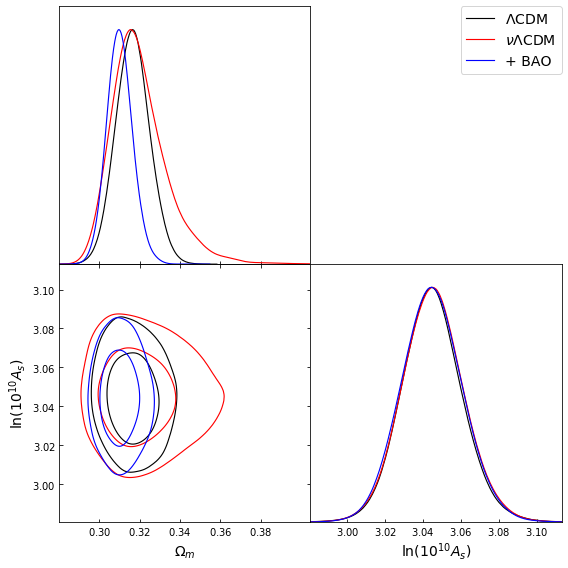

In [2]:
# by default the object below would use the chains provided in cup1d, but we want to access original chains here
root_dir=os.environ['PLANCK_CHAINS']
planck2018=planck_chains.get_planck_2018(model='base',data='plikHM_TTTEEE_lowl_lowE',
                                                root_dir=root_dir,linP_tag=None)
planck2018_mnu=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE',
                                                root_dir=root_dir,linP_tag=None)
planck2018_mnu_BAO=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE_BAO',
                                                root_dir=root_dir,linP_tag=None)
g = plots.getSubplotPlotter(width_inch=8)
g.settings.axes_fontsize = 10
g.settings.legend_fontsize = 14
g.triangle_plot([planck2018['samples'],planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['omegam','logA'],
                legend_labels=[r'$\Lambda$CDM',r'$\nu\Lambda$CDM',r'+ BAO'])

### Read original and extended Planck 2018 chains

Check whether the thinning in the linear power chain was too agressive

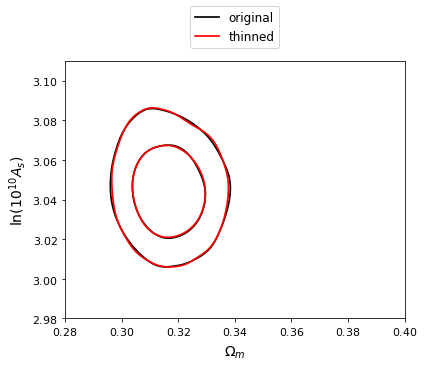

In [3]:
model='base'
data='plikHM_TTTEEE_lowl_lowE'
planck2018_original=planck_chains.get_planck_2018(model=model,data=data,root_dir=root_dir,linP_tag=None)
planck2018_thinned=planck_chains.get_planck_2018(model=model,data=data,linP_tag='zlinP_10')
g = plots.getSinglePlotter()
g.plot_2d([planck2018_original['samples'],planck2018_thinned['samples']],['omegam','logA'],lims=[0.28,0.4,2.98,3.11])
g.finish_plot(legend_labels=['original','thinned'])

### Read other extended Planck chains and plot linear power parameters

From now on we only work with extended chains, already provided in cup1d

In [2]:
# massless neutrinos, Planck only
planck2018=planck_chains.get_planck_2018(model='base',data='plikHM_TTTEEE_lowl_lowE',linP_tag='zlinP_10')
# massive neutrinos, Planck only
planck2018_mnu=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE',linP_tag='zlinP_10')
# massive neutrinos, Planck + BAO
planck2018_mnu_BAO=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE_BAO',linP_tag='zlinP_10')

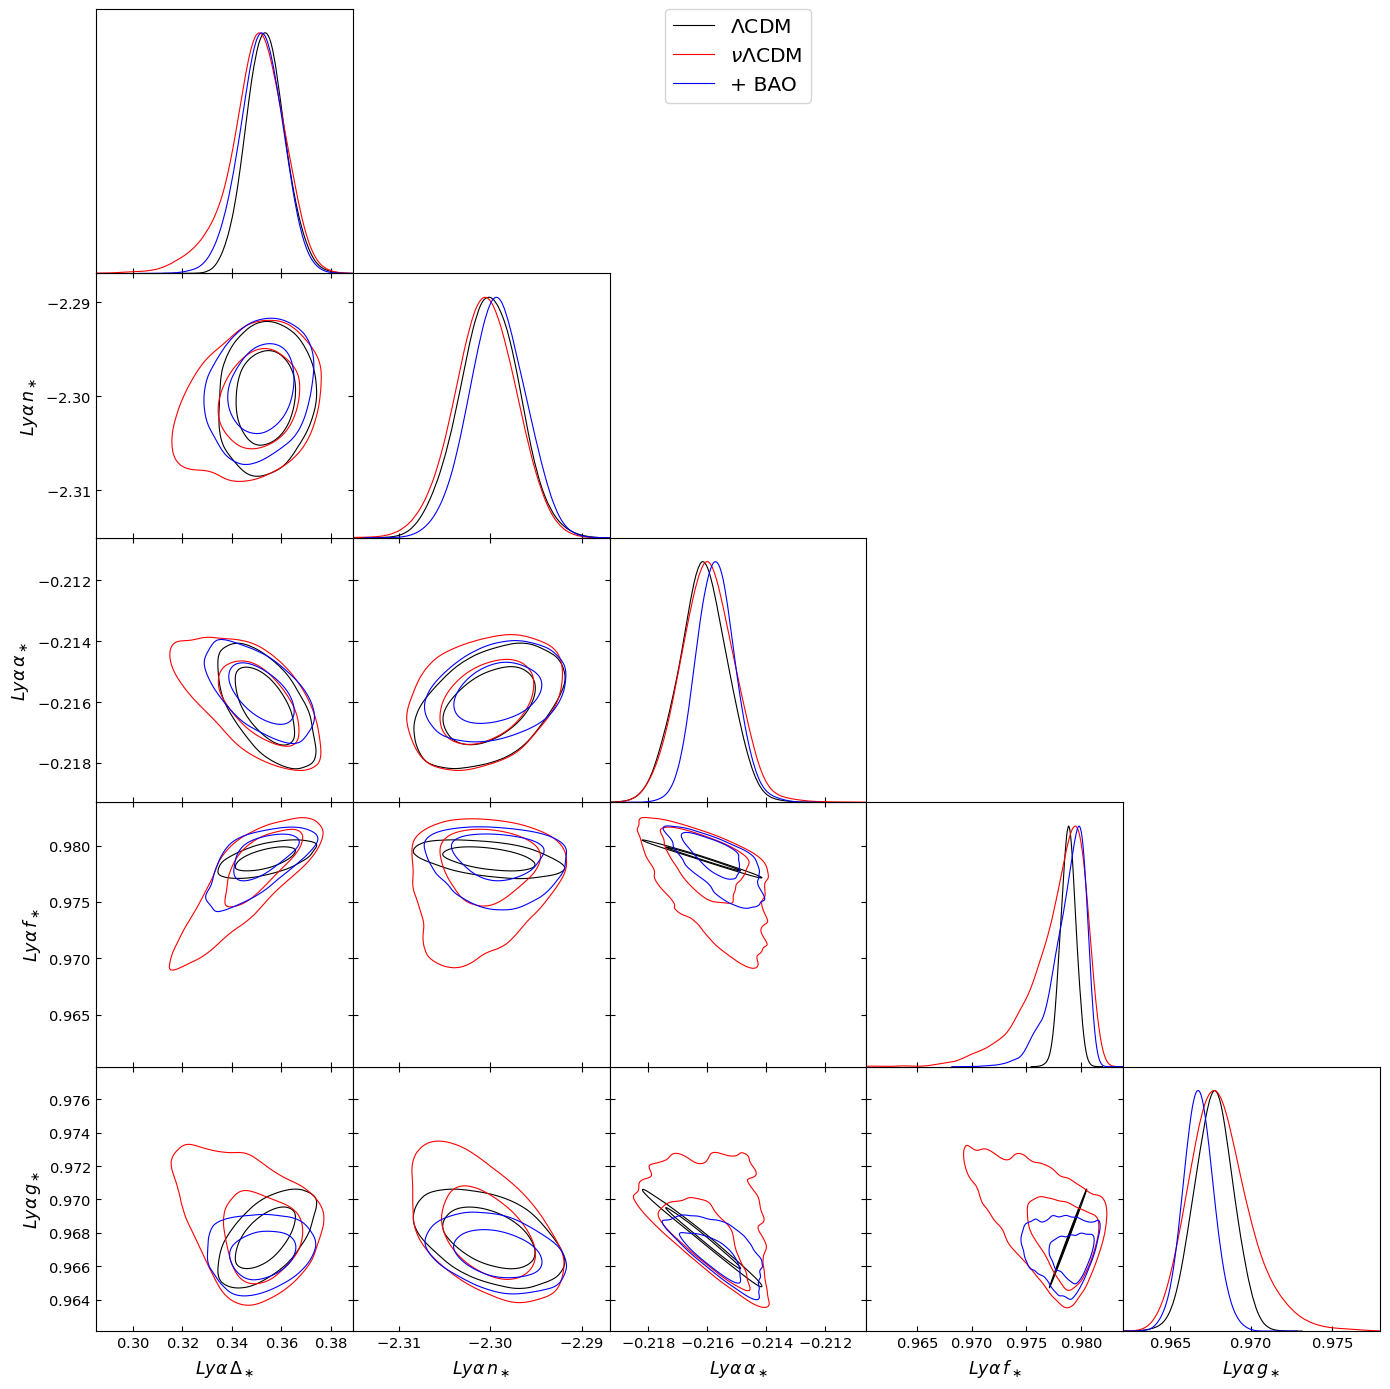

In [3]:
# linear power parameters
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([planck2018['samples'],planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star'],
                legend_labels=[r'$\Lambda$CDM',r'$\nu\Lambda$CDM',r'+ BAO'])